In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dataset = pd.read_csv('indian_liver_patient.csv')

In [28]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [29]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
dataset.shape

(583, 11)

In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Data Cleaning

checking duplicate tuples, if any removed

In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [ ]:
dataset.duplicated().sum()

13

In [ ]:
dataset=dataset.drop_duplicates()
print(dataset.shape)

(570, 11)


Checking Missing Values

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

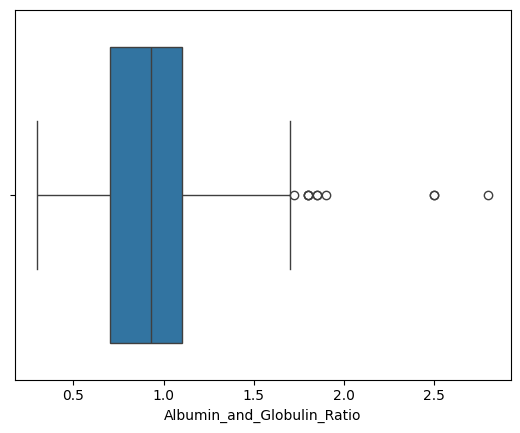

In [30]:
sns.boxplot(data = dataset, x= 'Albumin_and_Globulin_Ratio')

Q1= 0.700

Q3= 1.1000

IQR= 0.4

1.5*0.4=0.6

Q1*0.6=0.1

Q3+0.6=1.7

Anything away between 0.1 and 1.7 is considered to be an Outliner

In [31]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [32]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.93

In [33]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [34]:
dataset['Albumin_and_Globulin_Ratio']=dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [35]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Male VS Female

<Axes: xlabel='Gender', ylabel='count'>

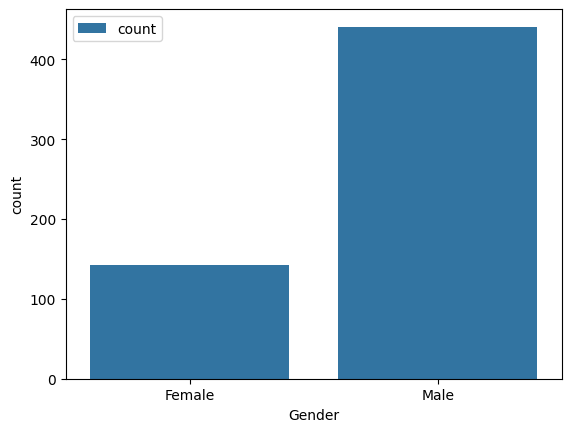

In [36]:
import seaborn as sns
sns.countplot(data= dataset, x='Gender', label='count')

In [37]:
Male, Female=dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

Number of patients that are male:  441
Number of patients that are female:  142


Encoding the Gender Column

Label Male as 1 and Female as 0

In [38]:
def partition(x):
  if x=='Male':
    return 1
  return 0

dataset['Gender']=dataset['Gender'].map(partition)

In [39]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Converting output column 'Dataset' to 0's and 1's

Dataset i.e output value has '1' for liver disease '2' for no liver disease so lets makeit 0 for no disease to make it convinient

In [40]:
def partition(x):
  if x==2:
    return 0
  return 1

dataset['Dataset']=dataset['Dataset'].map(partition)

In [41]:
dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

Correlation Matrix

<Axes: >

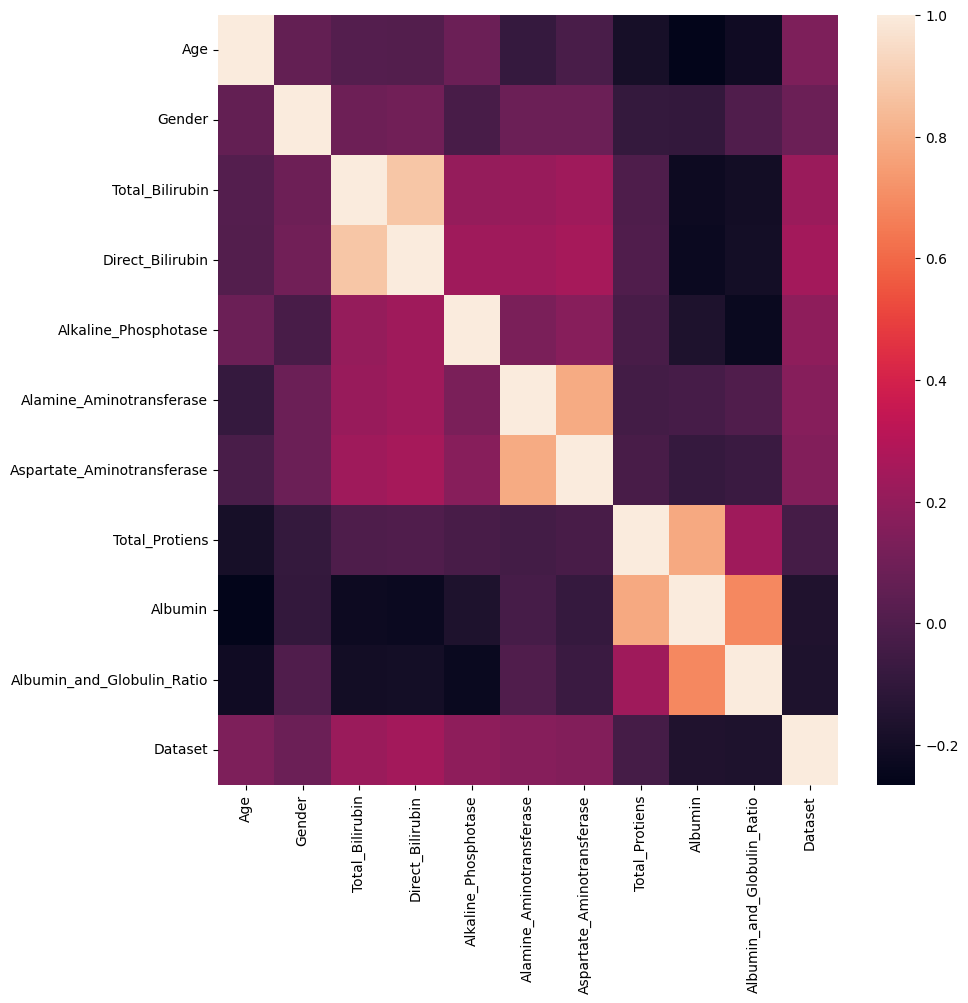

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

Data Preparation

In [43]:
x=dataset.iloc[: , :-1].values
y=dataset.iloc[: , -1].values

In [44]:
#splitting data in to training data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x ,y ,test_size=0.25, random_state=42)

In [45]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Machine Learning Models

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(random_state=0)
log_classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
#predicting the output
log_y_pred = log_classifier.predict(x_test)

<Axes: >

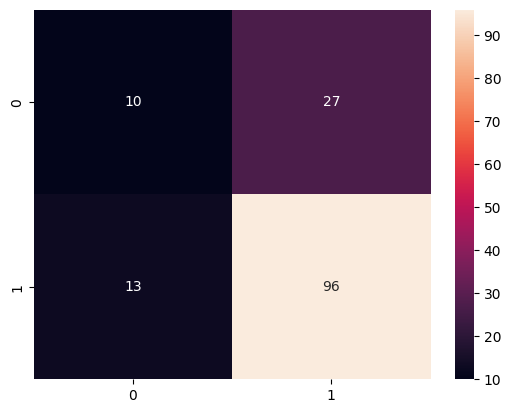

In [48]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test,log_y_pred)
sns.heatmap(log_cm , annot=True)

In [49]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))

0.726027397260274
0.7804878048780488


K Nearest Neighbours Algorithm

In [50]:
x_train.shape

(437, 10)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_Classifier = KNeighborsClassifier(n_neighbors=21, metric='minkowski')
knn_Classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [52]:
knn_y_pred=knn_Classifier.predict(x_test)

<Axes: >

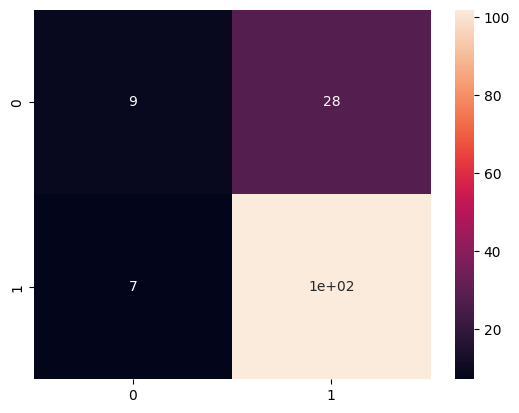

In [53]:
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test,knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [54]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test,knn_y_pred))

0.7602739726027398
0.7846153846153846


SVM

In [55]:
from sklearn.svm import SVC
svm_Classifier=SVC(kernel='rbf',random_state=0)
svm_Classifier.fit(x_train,y_train)

SVC(random_state=0)

In [56]:
svm_y_pred=svm_Classifier.predict(x_test)

<Axes: >

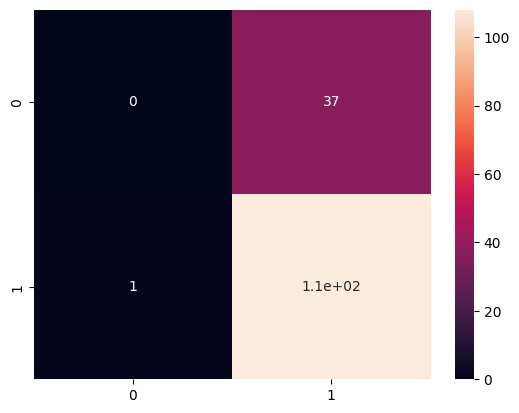

In [57]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(y_test,svm_y_pred)
sns.heatmap(svm_cm, annot=True)

In [58]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test,svm_y_pred))

0.7397260273972602
0.7448275862068966


Artifical Neural Network

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [60]:
#intializing the ANN
Classifier=Sequential()
#Adding the input layer and first hidden layer
Classifier.add(Dense(units=400,activation='relu',input_dim=10))
Classifier.add(Dropout(rate=0.1))
#Adding second hidden layer
Classifier.add(Dense(units=400,activation='relu'))
Classifier.add(Dropout(rate=0.1))
#output layer
Classifier.add(Dense(units=1,activation='sigmoid'))

In [61]:
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
Classifier.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 [==============================] - 2s 12ms/step - loss: 0.5827 - accuracy: 0.6911
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 0.5249 - accuracy: 0.7208
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.5180 - accuracy: 0.7185
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 0.5046 - accuracy: 0.7117
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.4944 - accuracy: 0.7346
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.4900 - accuracy: 0.7551
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.4941 - accuracy: 0.7185
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4778 - accuracy: 0.7437
Epoch 9/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4750 - accuracy: 0.7529
Epoch 10/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4733 - accuracy: 0.7506

In [63]:
ann_y_pred=Classifier.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [64]:
ann_y_pred[0]

array([0.40999192], dtype=float32)

In [65]:
ann_y_pred=ann_y_pred >=0.5

<Axes: >

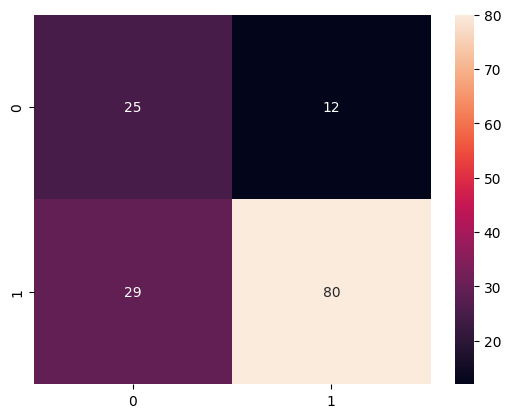

In [66]:
from sklearn.metrics import confusion_matrix
ann_cm=confusion_matrix(y_test,ann_y_pred)
sns.heatmap(ann_cm, annot=True)

In [67]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test,ann_y_pred))

0.7191780821917808
0.8695652173913043


Saving the models

In [68]:
import pickle
pickle.dump(knn_Classifier, open('model.pkl','wb'))
pickle.dump(sc, open('sc.pkl','wb'))